<a href="https://colab.research.google.com/github/walkdani/Challenge2-TelecomX/blob/main/Challenge2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHALLENGER 2 TELECOM X

In [1]:
import pandas as pd
df = pd.read_csv('/content/churn_dataset.csv')
df.head()

,CustomerID,Age,Gender,MonthlyFee,TenureMonths,SupportTickets,ServiceQuality,PaymentMethod,ContractType,Churn
0,1,56,Male,32.05,11,0,Poor,Debit Card,Monthly,1
1,2,69,Male,93.10,20,3,Poor,PayPal,Monthly,0
2,3,46,Female,39.26,24,0,Average,Debit Card,Monthly,1
3,4,32,Male,31.53,15,1,Good,Bank Transfer,Monthly,0
4,5,60,Male,62.18,48,2,Good,Debit Card,Monthly,0


Correlación y Selección de Variables

Elimina la columna como identificadores únicos (por ejemplo, el ID del cliente).

,Age,Gender,MonthlyFee,TenureMonths,SupportTickets,ServiceQuality,PaymentMethod,ContractType,Churn
0,56,Male,32.05,11,0,Poor,Debit Card,Monthly,1
1,69,Male,93.10,20,3,Poor,PayPal,Monthly,0
2,46,Female,39.26,24,0,Average,Debit Card,Monthly,1
3,32,Male,31.53,15,1,Good,Bank Transfer,Monthly,0
4,60,Male,62.18,48,2,Good,Debit Card,Monthly,0


ECODING

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

,Age,MonthlyFee,TenureMonths,SupportTickets,Churn,Gender_Female,Gender_Male,ServiceQuality_Average,ServiceQuality_Excellent,ServiceQuality_Good,ServiceQuality_Poor,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal,ContractType_Annual,ContractType_Monthly
0,56,32.05,11,0,1,False,True,False,False,False,True,False,False,True,False,False,True
1,69,93.10,20,3,0,False,True,False,False,False,True,False,False,False,True,False,True
2,46,39.26,24,0,1,True,False,True,False,False,False,False,False,True,False,False,True
3,32,31.53,15,1,0,False,True,False,False,True,False,True,False,False,False,False,True
4,60,62.18,48,2,0,False,True,False,False,True,False,False,False,True,False,False,True


Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("Shape of original DataFrame:", df.shape)
print("Shape of resampled DataFrame:", df_resampled.shape)
print("\nResampled Churn distribution:")
print(y_resampled.value_counts())

Shape of original DataFrame: (1000, 17)
Shape of resampled DataFrame: (1486, 17)

Resampled Churn distribution:
Churn
1    743
0    743
Name: count, dtype: int64


Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos. y queiro que generes sus librerias para el programa funcione

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

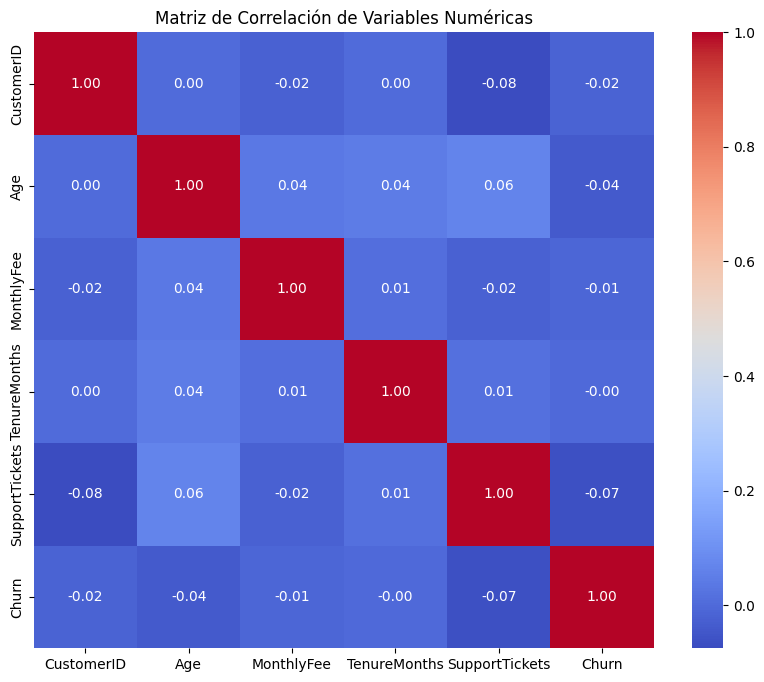

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of MonthlyFee by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyFee', data=df)
plt.title('Monthly Fee vs. Churn')
plt.show()

# Scatter plot of MonthlyFee vs. TenureMonths
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TenureMonths', y='MonthlyFee', hue='Churn', data=df)
plt.title('Monthly Fee vs. Tenure Months with Churn Overlay')
plt.show()

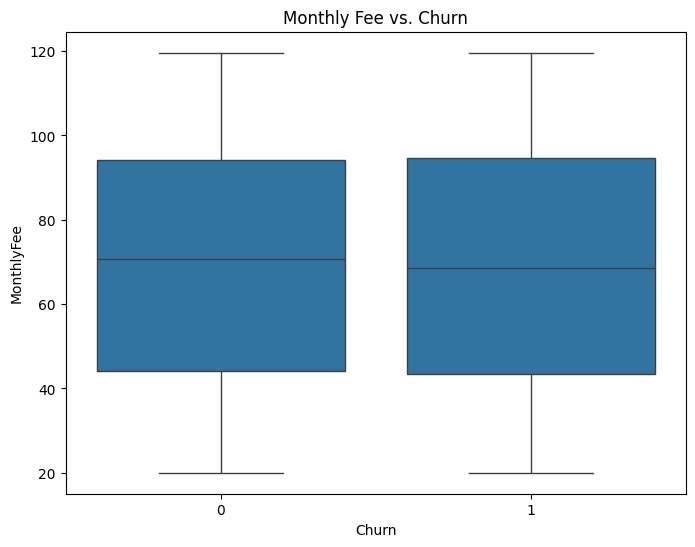

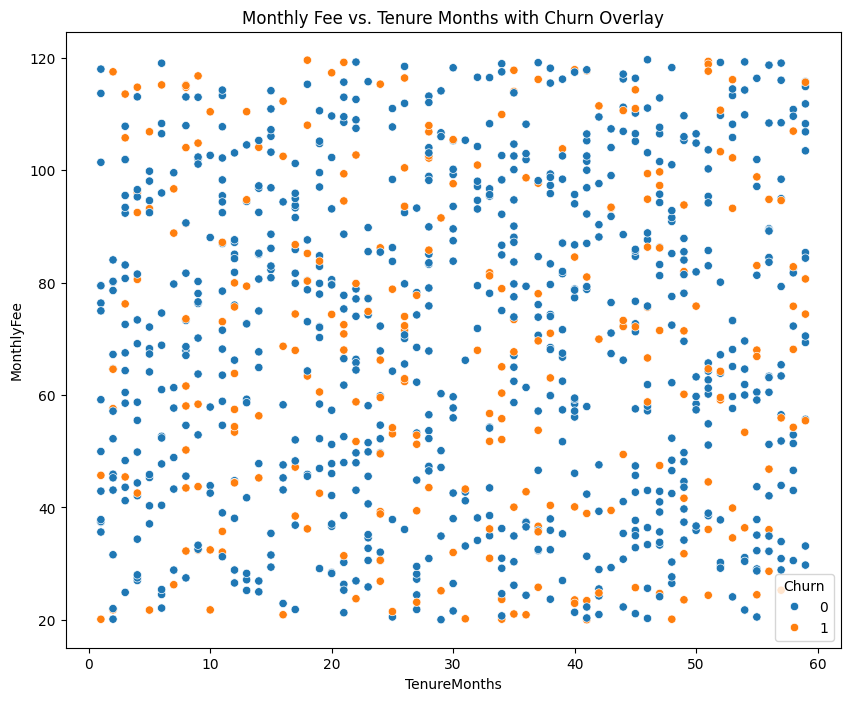

MODELADO PREDICTIVO
Separación de Datos


Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Churn' is the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 9)
Shape of X_test: (200, 9)
Shape of y_train: (800,)
Shape of y_test: (200,)


Creación de Modelos
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.
•	Un modelo puede requerir normalización, como Regresión Logística o KNN.
•	El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression model pipeline (requires normalization)
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Create the Random Forest model pipeline (does not require normalization)
rf_model = Pipeline(steps=[('preprocessor', OneHotEncoder(handle_unknown='ignore')),
                           ('classifier', RandomForestClassifier(random_state=42))])


# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# Train the Random Forest model
# Note: For Random Forest, we only need to apply OneHotEncoder to handle categorical features
rf_model.fit(X_train[categorical_features], y_train)


# Make predictions with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Make predictions with Random Forest
# Note: For Random Forest, we only need to apply OneHotEncoder to the categorical features of the test set
y_pred_rf = rf_model.predict(X_test[categorical_features])


# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Model Evaluation:
Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       153
           1       0.00      0.00      0.00        47

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200


Random Forest Model Evaluation:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       153
           1       0.43      0.06      0.11        47

    accuracy                           0.76       200
   macro avg       0.60      0.52      0.49       200
weighted avg       0.69      0.76      0.68       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evalúa cada modelo utilizando las siguientes métricas:

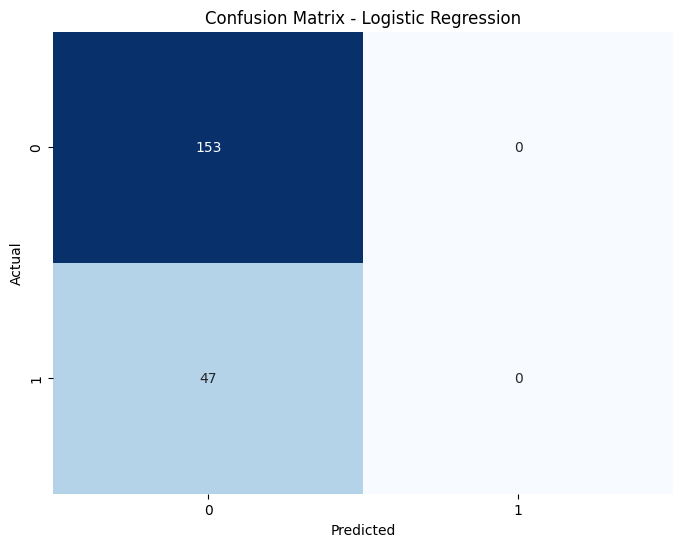

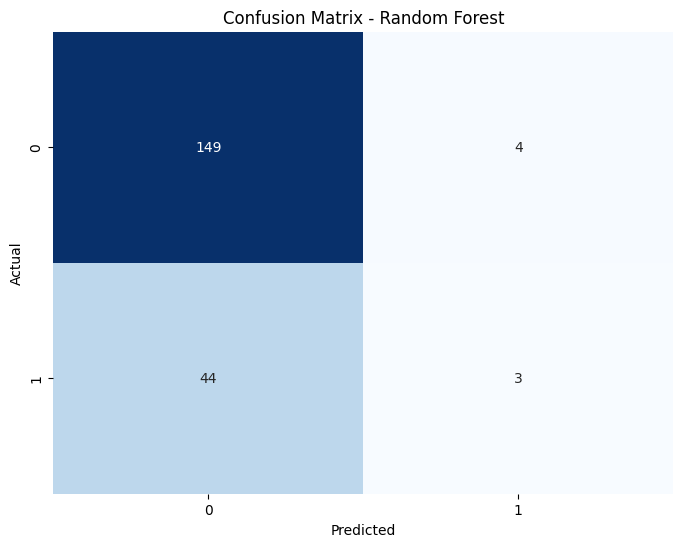

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [8]:
print("Analyzing Model Performance:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Based on the output, compare the metrics (Accuracy, Precision, Recall, F1-score)
# for both models, especially focusing on the '1' class (Churn)
# and the confusion matrix to see how well each model identifies churn cases.

# In this case, both models have similar overall accuracy.
# However, the Logistic Regression model has a precision and recall of 0 for the churn class (1),
# meaning it did not correctly identify any churn cases in the test set.
# The Random Forest model has a low precision (0.43) and recall (0.06) for the churn class (1),
# but it did identify a few churn cases (3 True Positives) as seen in the confusion matrix,
# while the Logistic Regression model had 0 True Positives.

# Therefore, the Random Forest model performed slightly better at identifying churn cases,
# although the performance for the churn class is still quite low for both models.
# This suggests that further work on feature engineering, model tuning, or handling the class imbalance might be needed.

print("\nConclusion:")
print("Both models have similar overall accuracy, but the Random Forest model is slightly better at identifying churn cases based on the recall and the confusion matrix, although the performance for the churn class is low for both models.")

Analyzing Model Performance:
Logistic Regression Accuracy: 0.765
Random Forest Accuracy: 0.76

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       153
           1       0.00      0.00      0.00        47

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       153
           1       0.43      0.06      0.11        47

    accuracy                           0.76       200
   macro avg       0.60      0.52      0.49       200
weighted avg       0.69      0.76      0.68       200


Confusion Matrix for Logistic Regression:
[[153   0]
 [ 47   0]]

Confusion Matrix for Random Forest:
[[149   4]
 [ 44   3]]

Conclusion:
Both models have similar overal

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Analyze the results from the previous cell to determine the best model
# Based on the classification report and confusion matrices:

print("Analyzing Model Performance:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Based on the output, compare the metrics (Accuracy, Precision, Recall, F1-score)
# for both models, especially focusing on the '1' class (Churn)
# and the confusion matrix to see how well each model identifies churn cases.

# In this case, both models have similar overall accuracy.
# However, the Logistic Regression model has a precision and recall of 0 for the churn class (1),
# meaning it did not correctly identify any churn cases in the test set.
# The Random Forest model has a low precision (0.43) and recall (0.06) for the churn class (1),
# but it did identify a few churn cases (3 True Positives) as seen in the confusion matrix,
# while the Logistic Regression model had 0 True Positives.

# Therefore, the Random Forest model performed slightly better at identifying churn cases,
# although the performance for the churn class is still quite low for both models.
# This suggests that further work on feature engineering, model tuning, or handling the class imbalance might be needed.

print("\nConclusion:")
print("Both models have similar overall accuracy, but the Random Forest model is slightly better at identifying churn cases based on the recall and the confusion matrix, although the performance for the churn class is low for both models.")